# From SQLAlchemy results to a Graph

#### EXERCISE:
We can also take advantage of <code>pandas</code> and <code>Matplotlib</code> to build figures of our data. Remember that data visualization is essential for both exploratory data analysis and communication of your data!

#### INSTRUCTIONS:
* Import <code>matplotlib.pyplot</code> as <code>plt</code>.
* Create a DataFrame <code>df</code> using <code>pd.DataFrame()</code> on the provided <code>results</code>.
* Set the columns of the DataFrame <code>df.columns</code> to be the columns from the first result object <code>results[0].keys()</code>.
* Print the DataFrame <code>df</code>.
* Use the <code>plot.bar()</code> method on <code>df</code> to create a bar plot of the results.
* Display the plot with <code>plt.show()</code>.

#### SCRIPT.PY:

        state  population
0  California    36609002
1       Texas    24214127
2    New York    19465159
3     Florida    18257662
4    Illinois    12867077


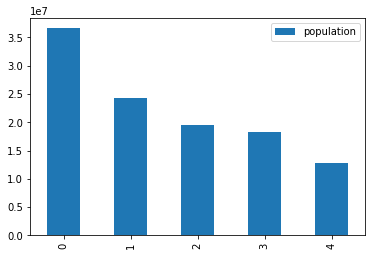

In [5]:
from sqlalchemy import create_engine, MetaData, Table, select, func, desc
import pandas as pd
engine = create_engine("sqlite:///../01-Basics of Relational Databases/census.sqlite")
connection = engine.connect()
census = Table("census", MetaData(bind=None), autoload=True, autoload_with=engine)
pop2008_sum = func.sum(census.columns.pop2008).label("population")
stmt = select([census.columns.state, pop2008_sum])
stmt = stmt.order_by(desc(pop2008_sum))
stmt = stmt.group_by(census.columns.state)
results = connection.execute(stmt).fetchmany(5)
%matplotlib inline
# Import pyplot as plt from matplotlib
from matplotlib import pyplot as plt

# Create a DataFrame from the results: df
df = pd.DataFrame(results)

# Set Column names
df.columns = results[0].keys()

# Print the DataFrame
print(df)

# Plot the DataFrame
df.plot.bar()
plt.show()